In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib.pyplot as plt


In [5]:
path_ad='../0-esercitazione/ds_adolescenti.csv'
path_at='../0-esercitazione/ds_atleti.csv'

ds_adolscenti = pd.read_csv(path_ad,delimiter=';',header=None)
ds_atleti = pd.read_csv(path_at,delimiter=';',header=None)

i1 = ds_adolscenti
i2 = ds_atleti
frames = [i1,i2]
ds_tot=pd.concat(frames)

ds_tot=sklearn.preprocessing.minmax_scale(ds_tot)

n1 = i1.shape[0]
n2 = i2.shape[0]
y = np.block([np.ones(n1),-1*np.ones(n2)])

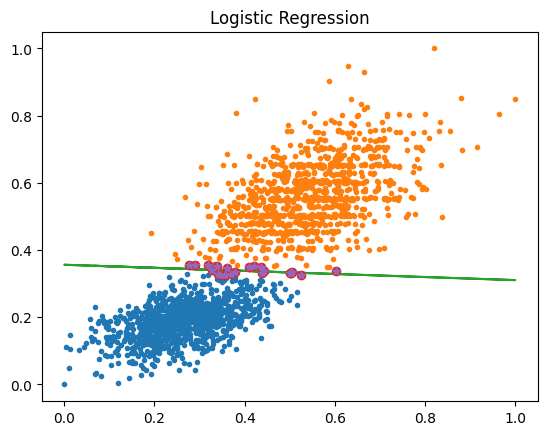

In [7]:
clf = sklearn.linear_model.LogisticRegression(solver='lbfgs',max_iter=3000,penalty='none')
clf.fit(ds_tot,y)
yt = clf.predict(ds_tot)
yp = clf.predict_proba(ds_tot)
it = yt==1
jt = yt==-1
i0p = np.array([np.abs(yp[:,0]-0.5)<0.25])
i1p = np.array([np.abs(yp[:,1]-0.5)<0.25])
ysep = (-1*clf.coef_[0,0]*ds_tot[:,0] - clf.intercept_)/clf.coef_[0,1]

plt.figure(2)
plt.title("Logistic Regression")
plt.plot(ds_tot[it,0],ds_tot[it,1],'.',ds_tot[jt,0],ds_tot[jt,1],'.',ds_tot[:,0],ysep,'-',ds_tot[i1p[0],0],ds_tot[i1p[0],1],'o',ds_tot[i0p[0],0],ds_tot[i0p[0],1],'*');
plt.ion()
plt.show()
plt.pause(1.0001)
